# Predicting ABV in Craft Beer

Using the craft beer data set from kaggle - found [here](https://www.kaggle.com/nickhould/craft-cans) - I performed a simple linear regression using a beer's IBU to predict it's ABV. IBU describes how bitter a beer is and ABV is the alcohol content by volume.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
beer = pd.read_csv('beers.csv')

In [4]:
beer.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [5]:
beer.shape

(2410, 8)

In [6]:
beer.drop(columns='Unnamed: 0', inplace=True)

In [7]:
beer.isnull().sum()

abv             62
ibu           1005
id               0
name             0
style            5
brewery_id       0
ounces           0
dtype: int64

In [8]:
beer.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


In [9]:
beer.dropna(inplace=True)

In [10]:
beer.shape

(1403, 7)

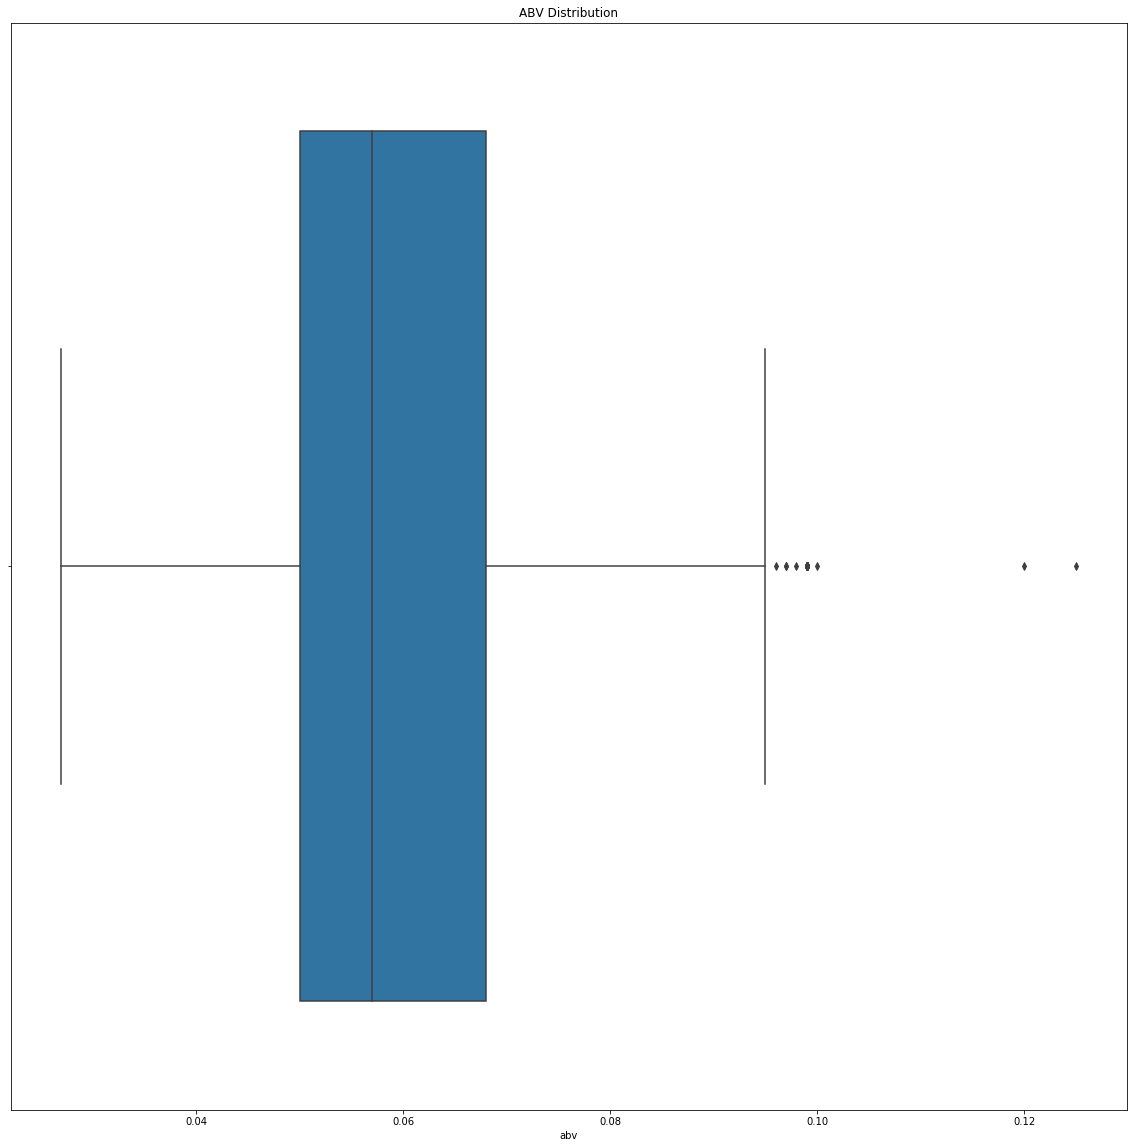

In [11]:
plt.figure(figsize=(20, 20))
sns.boxplot(beer['abv'])
plt.title('ABV Distribution')
plt.savefig('ABV_Dist')
plt.show()

In [12]:
timelapseQ1 = beer['abv'].quantile(0.25)
timelapseQ3 = beer['abv'].quantile(0.75)
IQR = timelapseQ3 - timelapseQ1
print(IQR)

0.018000000000000002


In [13]:
beer = beer[~((beer['abv'] < (timelapseQ1 - 1.5 * IQR)) |(beer['abv'] > (timelapseQ3 + 1.5 * IQR)))]
beer.shape

(1371, 7)

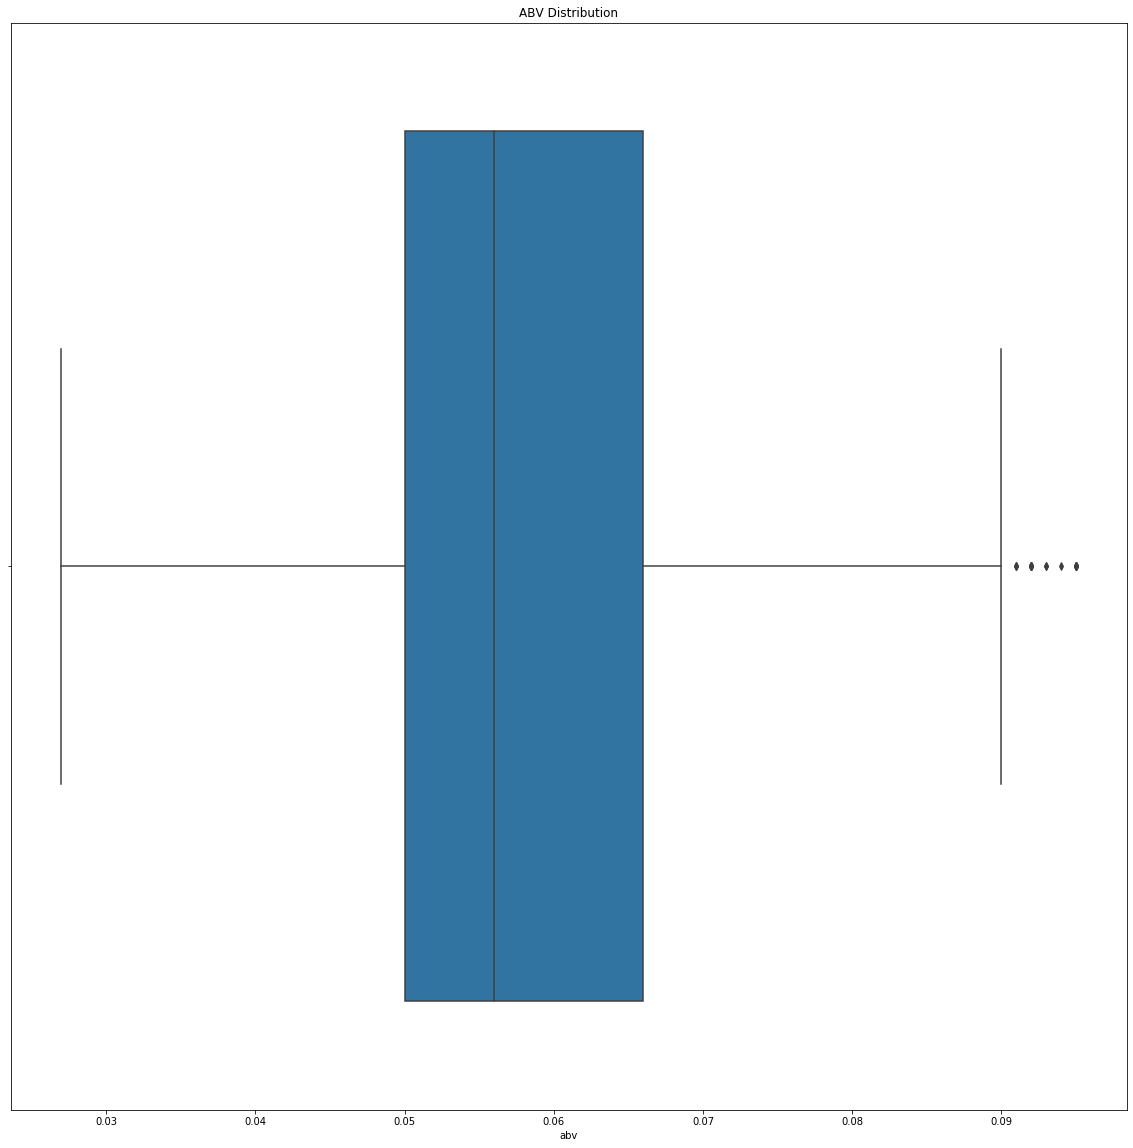

In [14]:
plt.figure(figsize=(20, 20))
sns.boxplot(beer['abv'])
plt.title('ABV Distribution')
plt.savefig('ABV_Dist')
plt.show()

In [15]:
beer['abv'].describe()

count    1371.000000
mean        0.058977
std         0.012214
min         0.027000
25%         0.050000
50%         0.056000
75%         0.066000
max         0.095000
Name: abv, dtype: float64

In [31]:
beer['style_codes'] = beer['style'].astype('category').cat.codes

In [32]:
beer.corr()

,abv,ibu,id,brewery_id,ounces,style_codes
abv,1.000000,0.651646,-0.021843,0.013532,0.098089,-0.125081
ibu,0.651646,1.000000,0.008387,0.006128,0.055133,-0.401753
id,-0.021843,0.008387,1.000000,-0.433505,0.051318,-0.052425
brewery_id,0.013532,0.006128,-0.433505,1.000000,-0.126182,0.012906
ounces,0.098089,0.055133,0.051318,-0.126182,1.000000,0.015918
style_codes,-0.125081,-0.401753,-0.052425,0.012906,0.015918,1.000000


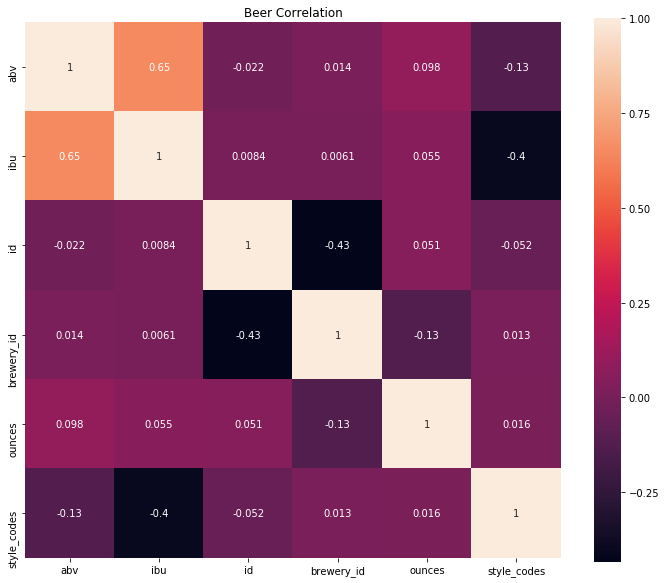

In [33]:
plt.figure(figsize=(12, 10))
plt.title('Beer Correlation')
ax = sns.heatmap(beer.corr(), annot = True,square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig('BeerCorr.png')
plt.show()

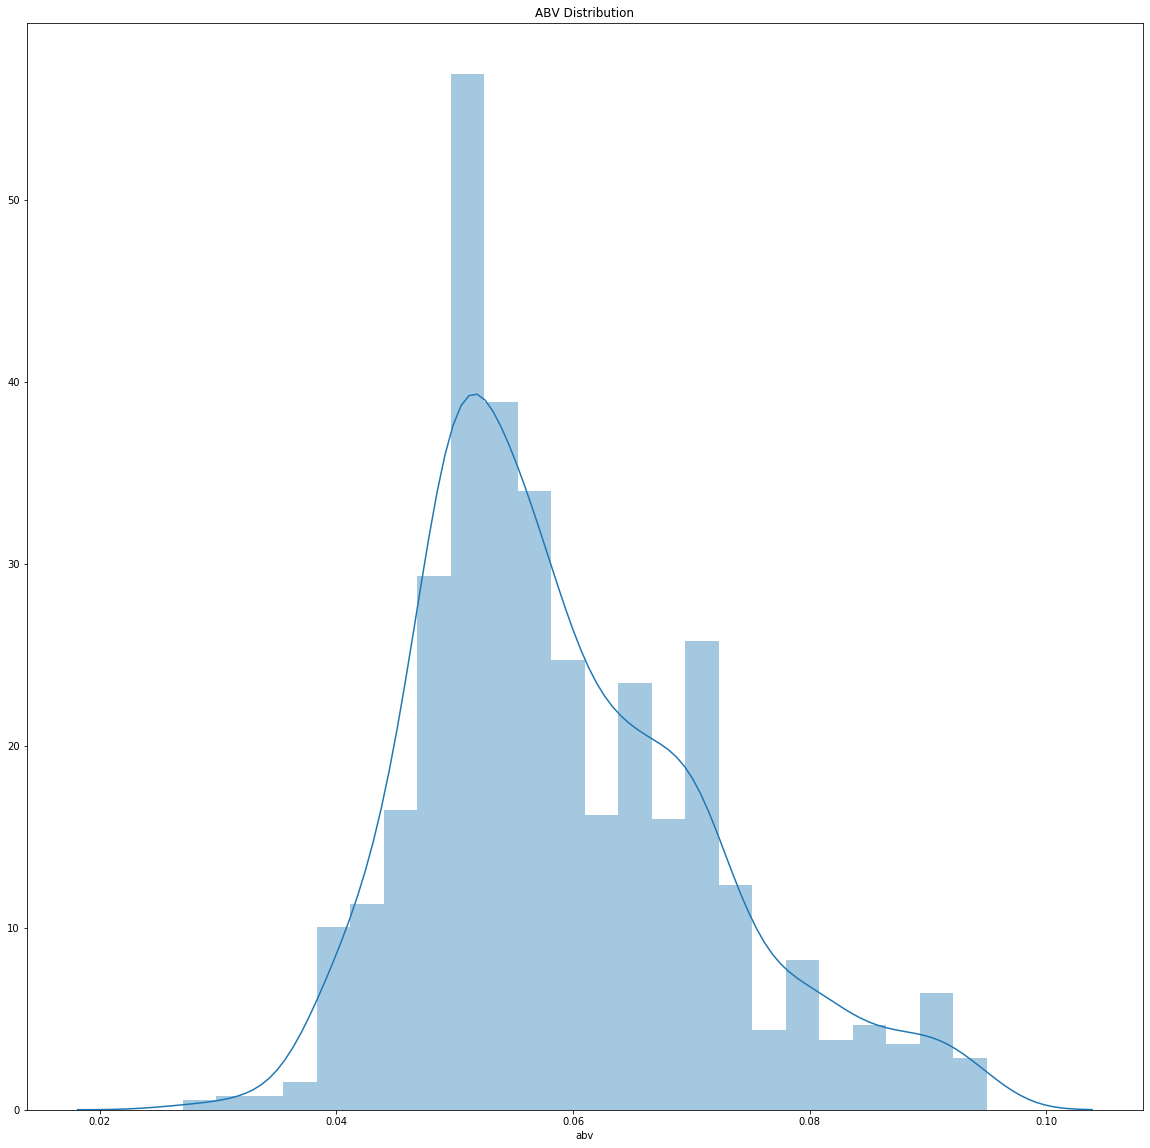

In [18]:
plt.figure(figsize=(20,20))
plt.title('ABV Distribution')
sns.distplot(beer['abv'])
plt.savefig('ABVDist.png')
plt.show()

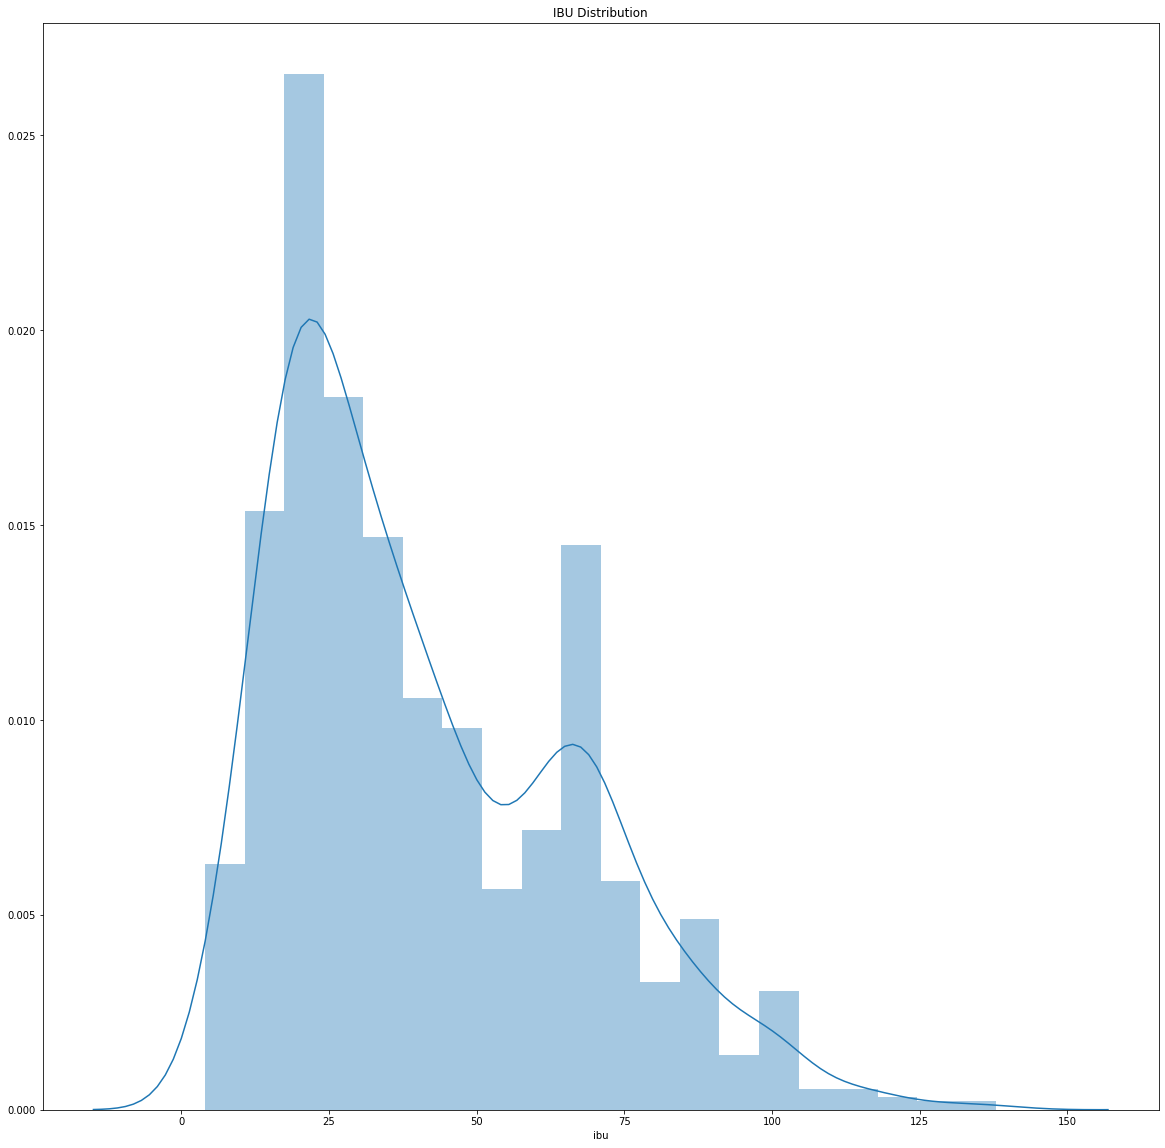

In [19]:
plt.figure(figsize=(20,20))
plt.title('IBU Distribution')
sns.distplot(beer['ibu'])
plt.savefig('IBUDist.png')
plt.show()

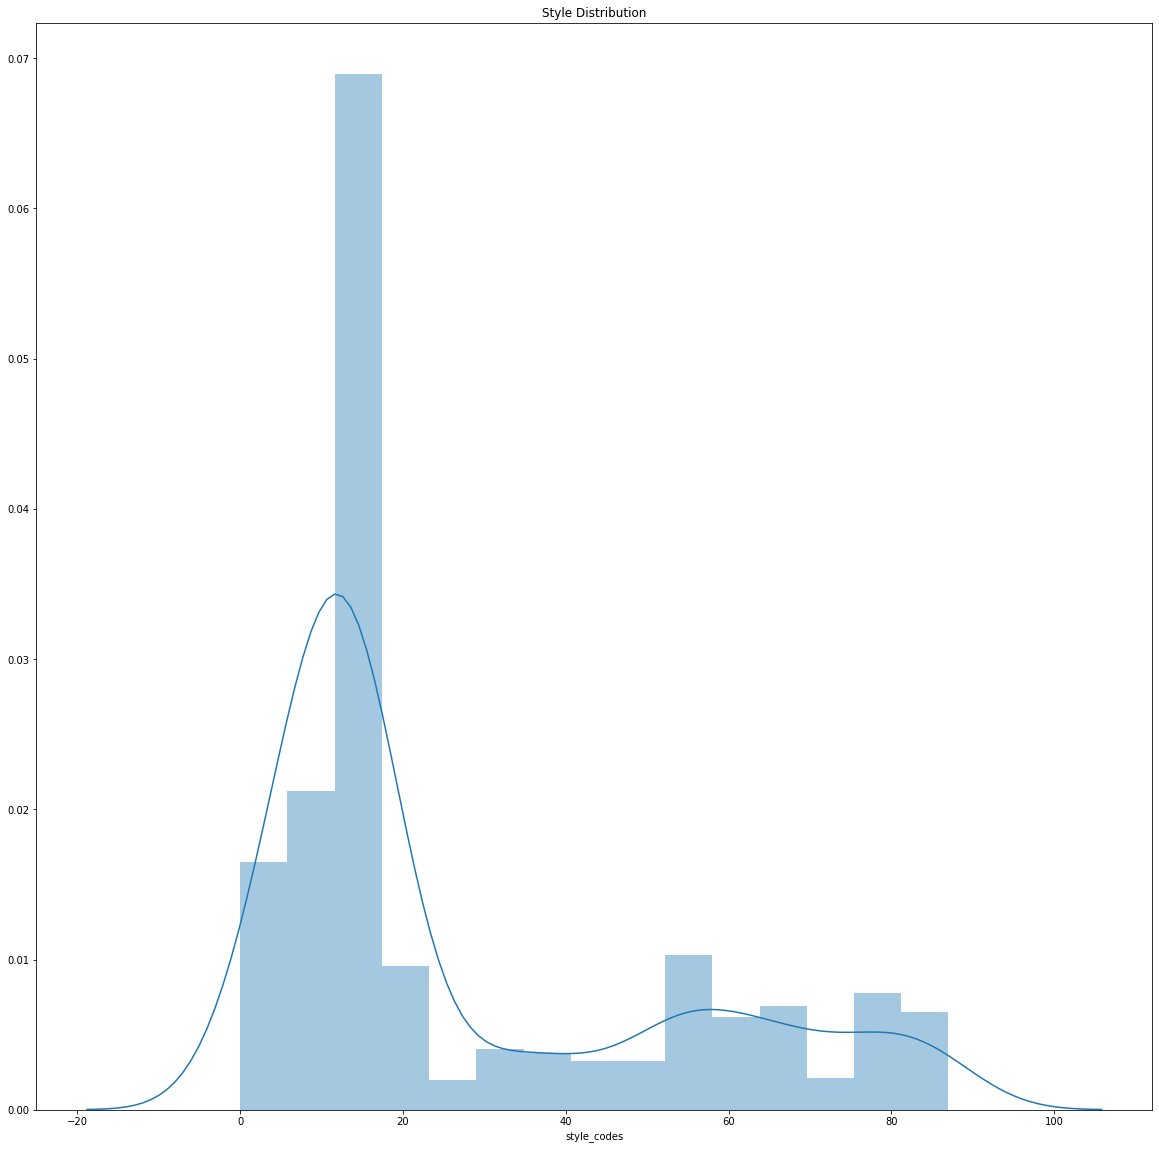

In [35]:
plt.figure(figsize=(20,20))
plt.title('Style Distribution')
sns.distplot(beer['style_codes'])
plt.savefig('StyleDist.png')
plt.show()

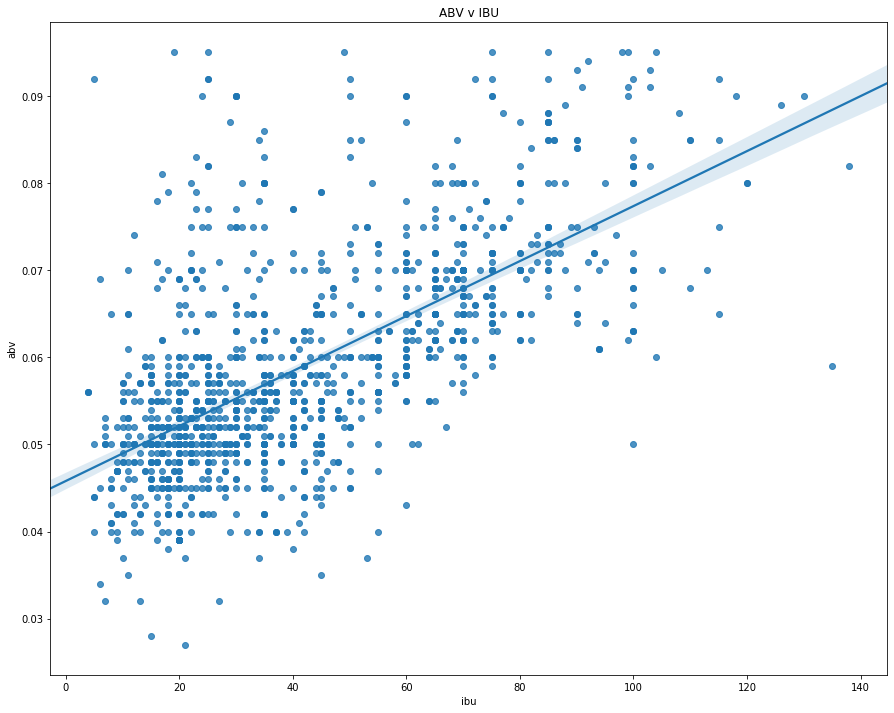

In [20]:
plt.figure(figsize=(15, 12))
plt.title('ABV v IBU')
sns.regplot(beer['ibu'], beer['abv'])
plt.savefig('abvibuscat.png')
plt.show()

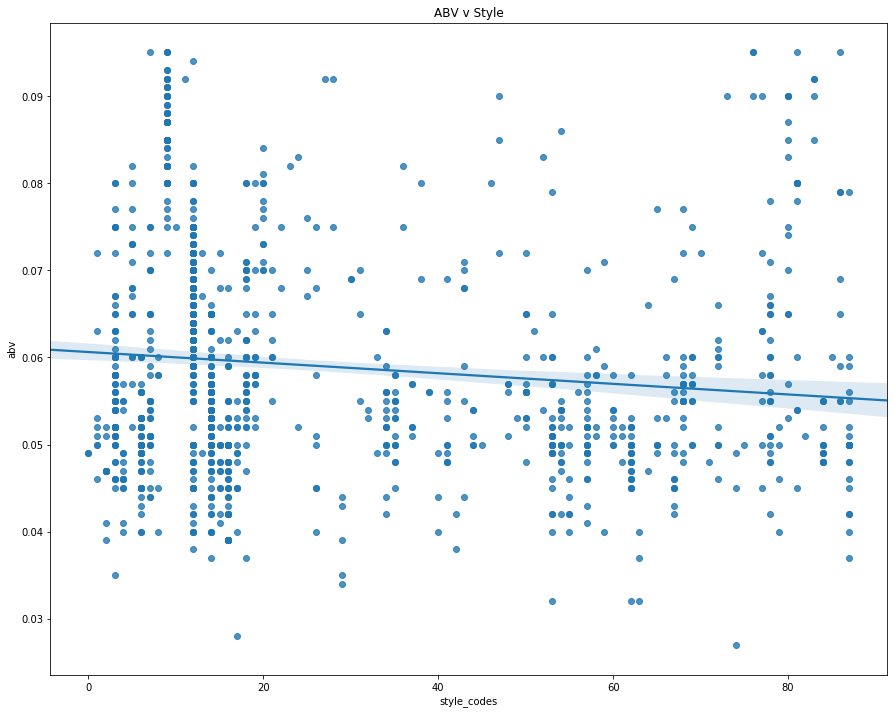

In [36]:
plt.figure(figsize=(15, 12))
plt.title('ABV v Style')
sns.regplot(beer['style_codes'], beer['abv'])
plt.savefig('abvstylescat.png')
plt.show()

In [38]:
target = beer['abv']

In [39]:
feature = beer['style_codes']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=34,test_size=0.2)

In [41]:
model = sm.OLS(y_train,X_train.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    abv   R-squared (uncentered):                   0.499
Model:                            OLS   Adj. R-squared (uncentered):              0.499
Method:                 Least Squares   F-statistic:                              1092.
Date:                Mon, 30 Mar 2020   Prob (F-statistic):                   1.07e-166
Time:                        20:39:10   Log-Likelihood:                          1899.6
No. Observations:                1096   AIC:                                     -3797.
Df Residuals:                    1095   BIC:                                     -3792.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
style_codes     0.0011   3.47e-05     33.047      0.000       0.001       0.001
==============================================================================
Omnibus:                      101.232   Durbin-Watson:                   1.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.490
Skew:                          -0.757   Prob(JB):                     1.38e-25
Kurtosis:                       2.539   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
ytest_pred = model.predict(X_test)

In [44]:
ytrain_pred = model.predict(X_train)

In [45]:
print('Train - Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train, ytrain_pred)))
print('Train - Mean Squared Error:' + str(metrics.mean_squared_error(y_train, ytrain_pred)))
print('Train - SqRt Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, ytrain_pred))))

print("")

print('Test - Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, ytest_pred)))
print('Test - Mean Squared Error:' + str(metrics.mean_squared_error(y_test, ytest_pred)))
print('Test - SqRt Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, ytest_pred))))

Train - Mean Absolute Error:0.038659808621604314
Train - Mean Squared Error:0.0018285227282905142
Train - SqRt Mean Squared Error:0.04276122926542821

Test - Mean Absolute Error:0.03980693078690069
Test - Mean Squared Error:0.001929717031194147
Test - SqRt Mean Squared Error:0.043928544605918225


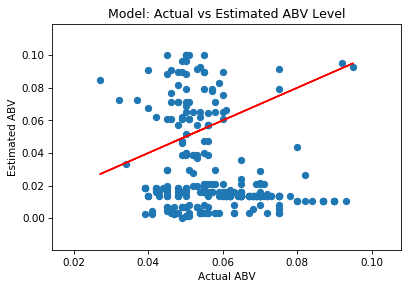

In [46]:
plt.figure(dpi = 75)
plt.scatter(y_test, ytest_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ABV")
plt.ylabel("Estimated ABV")
plt.title("Model: Actual vs Estimated ABV Level")
plt.savefig('ModelThreeResid.png')
plt.show()

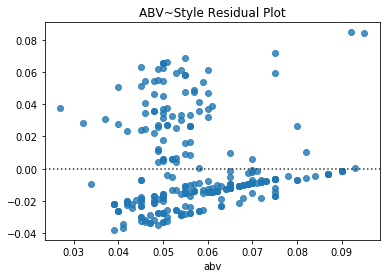

In [50]:
sns.residplot(y_test, ytest_pred)
plt.title('ABV~Style Residual Plot')
plt.savefig('ABVstyle.png')
plt.show()

In [51]:
feature = beer['ibu']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=34,test_size=0.2)

In [53]:
model = sm.OLS(y_train,X_train.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    abv   R-squared (uncentered):                   0.819
Model:                            OLS   Adj. R-squared (uncentered):              0.819
Method:                 Least Squares   F-statistic:                              4968.
Date:                Mon, 30 Mar 2020   Prob (F-statistic):                        0.00
Time:                        20:51:54   Log-Likelihood:                          2458.3
No. Observations:                1096   AIC:                                     -4915.
Df Residuals:                    1095   BIC:                                     -4910.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ibu            0.0011   1.58e-05     70.485      0.000       0.001       0.001
==============================================================================
Omnibus:                       55.131   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.156
Skew:                          -0.543   Prob(JB):                     1.93e-14
Kurtosis:                       3.451   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
ytest_pred = model.predict(X_test)
ytest_pred

2015    0.010046
84      0.036836
1986    0.022325
2304    0.083719
107     0.089300
          ...   
264     0.090416
1180    0.012279
1081    0.022325
905     0.012279
1810    0.033487
Length: 275, dtype: float64

In [55]:
ytrain_pred = model.predict(X_train)

In [56]:
print('Train - Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train, ytrain_pred)))
print('Train - Mean Squared Error:' + str(metrics.mean_squared_error(y_train, ytrain_pred)))
print('Train - SqRt Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, ytrain_pred))))

print("")

print('Test - Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, ytest_pred)))
print('Test - Mean Squared Error:' + str(metrics.mean_squared_error(y_test, ytest_pred)))
print('Test - SqRt Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, ytest_pred))))

Train - Mean Absolute Error:0.021467642036035118
Train - Mean Squared Error:0.0006595892151870644
Train - SqRt Mean Squared Error:0.025682469024357148

Test - Mean Absolute Error:0.02047128680204676
Test - Mean Squared Error:0.0005965358089851192
Test - SqRt Mean Squared Error:0.024424082561789687


In [57]:
model.rsquared

0.8194024047097581

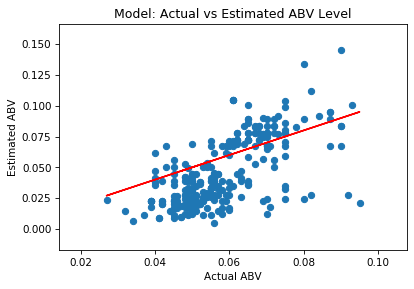

In [58]:
plt.figure(dpi = 75)
plt.scatter(y_test, ytest_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ABV")
plt.ylabel("Estimated ABV")
plt.title("Model: Actual vs Estimated ABV Level")
plt.savefig('ModelOneResid.png')
plt.show()

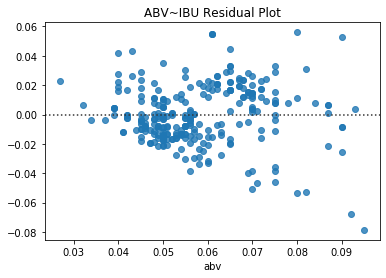

In [59]:
sns.residplot(y_test, ytest_pred)
plt.title('ABV~IBU Residual Plot')
plt.savefig('ABVIBU.png')
plt.show()

In [60]:
model = sm.OLS(y_test,X_test.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    abv   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.831
Method:                 Least Squares   F-statistic:                              1349.
Date:                Mon, 30 Mar 2020   Prob (F-statistic):                   7.92e-108
Time:                        20:52:19   Log-Likelihood:                          630.80
No. Observations:                 275   AIC:                                     -1260.
Df Residuals:                     274   BIC:                                     -1256.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ibu            0.0011   3.09e-05     36.722      0.000       0.001       0.001
==============================================================================
Omnibus:                        5.520   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.342
Skew:                          -0.338   Prob(JB):                       0.0692
Kurtosis:                       3.095   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

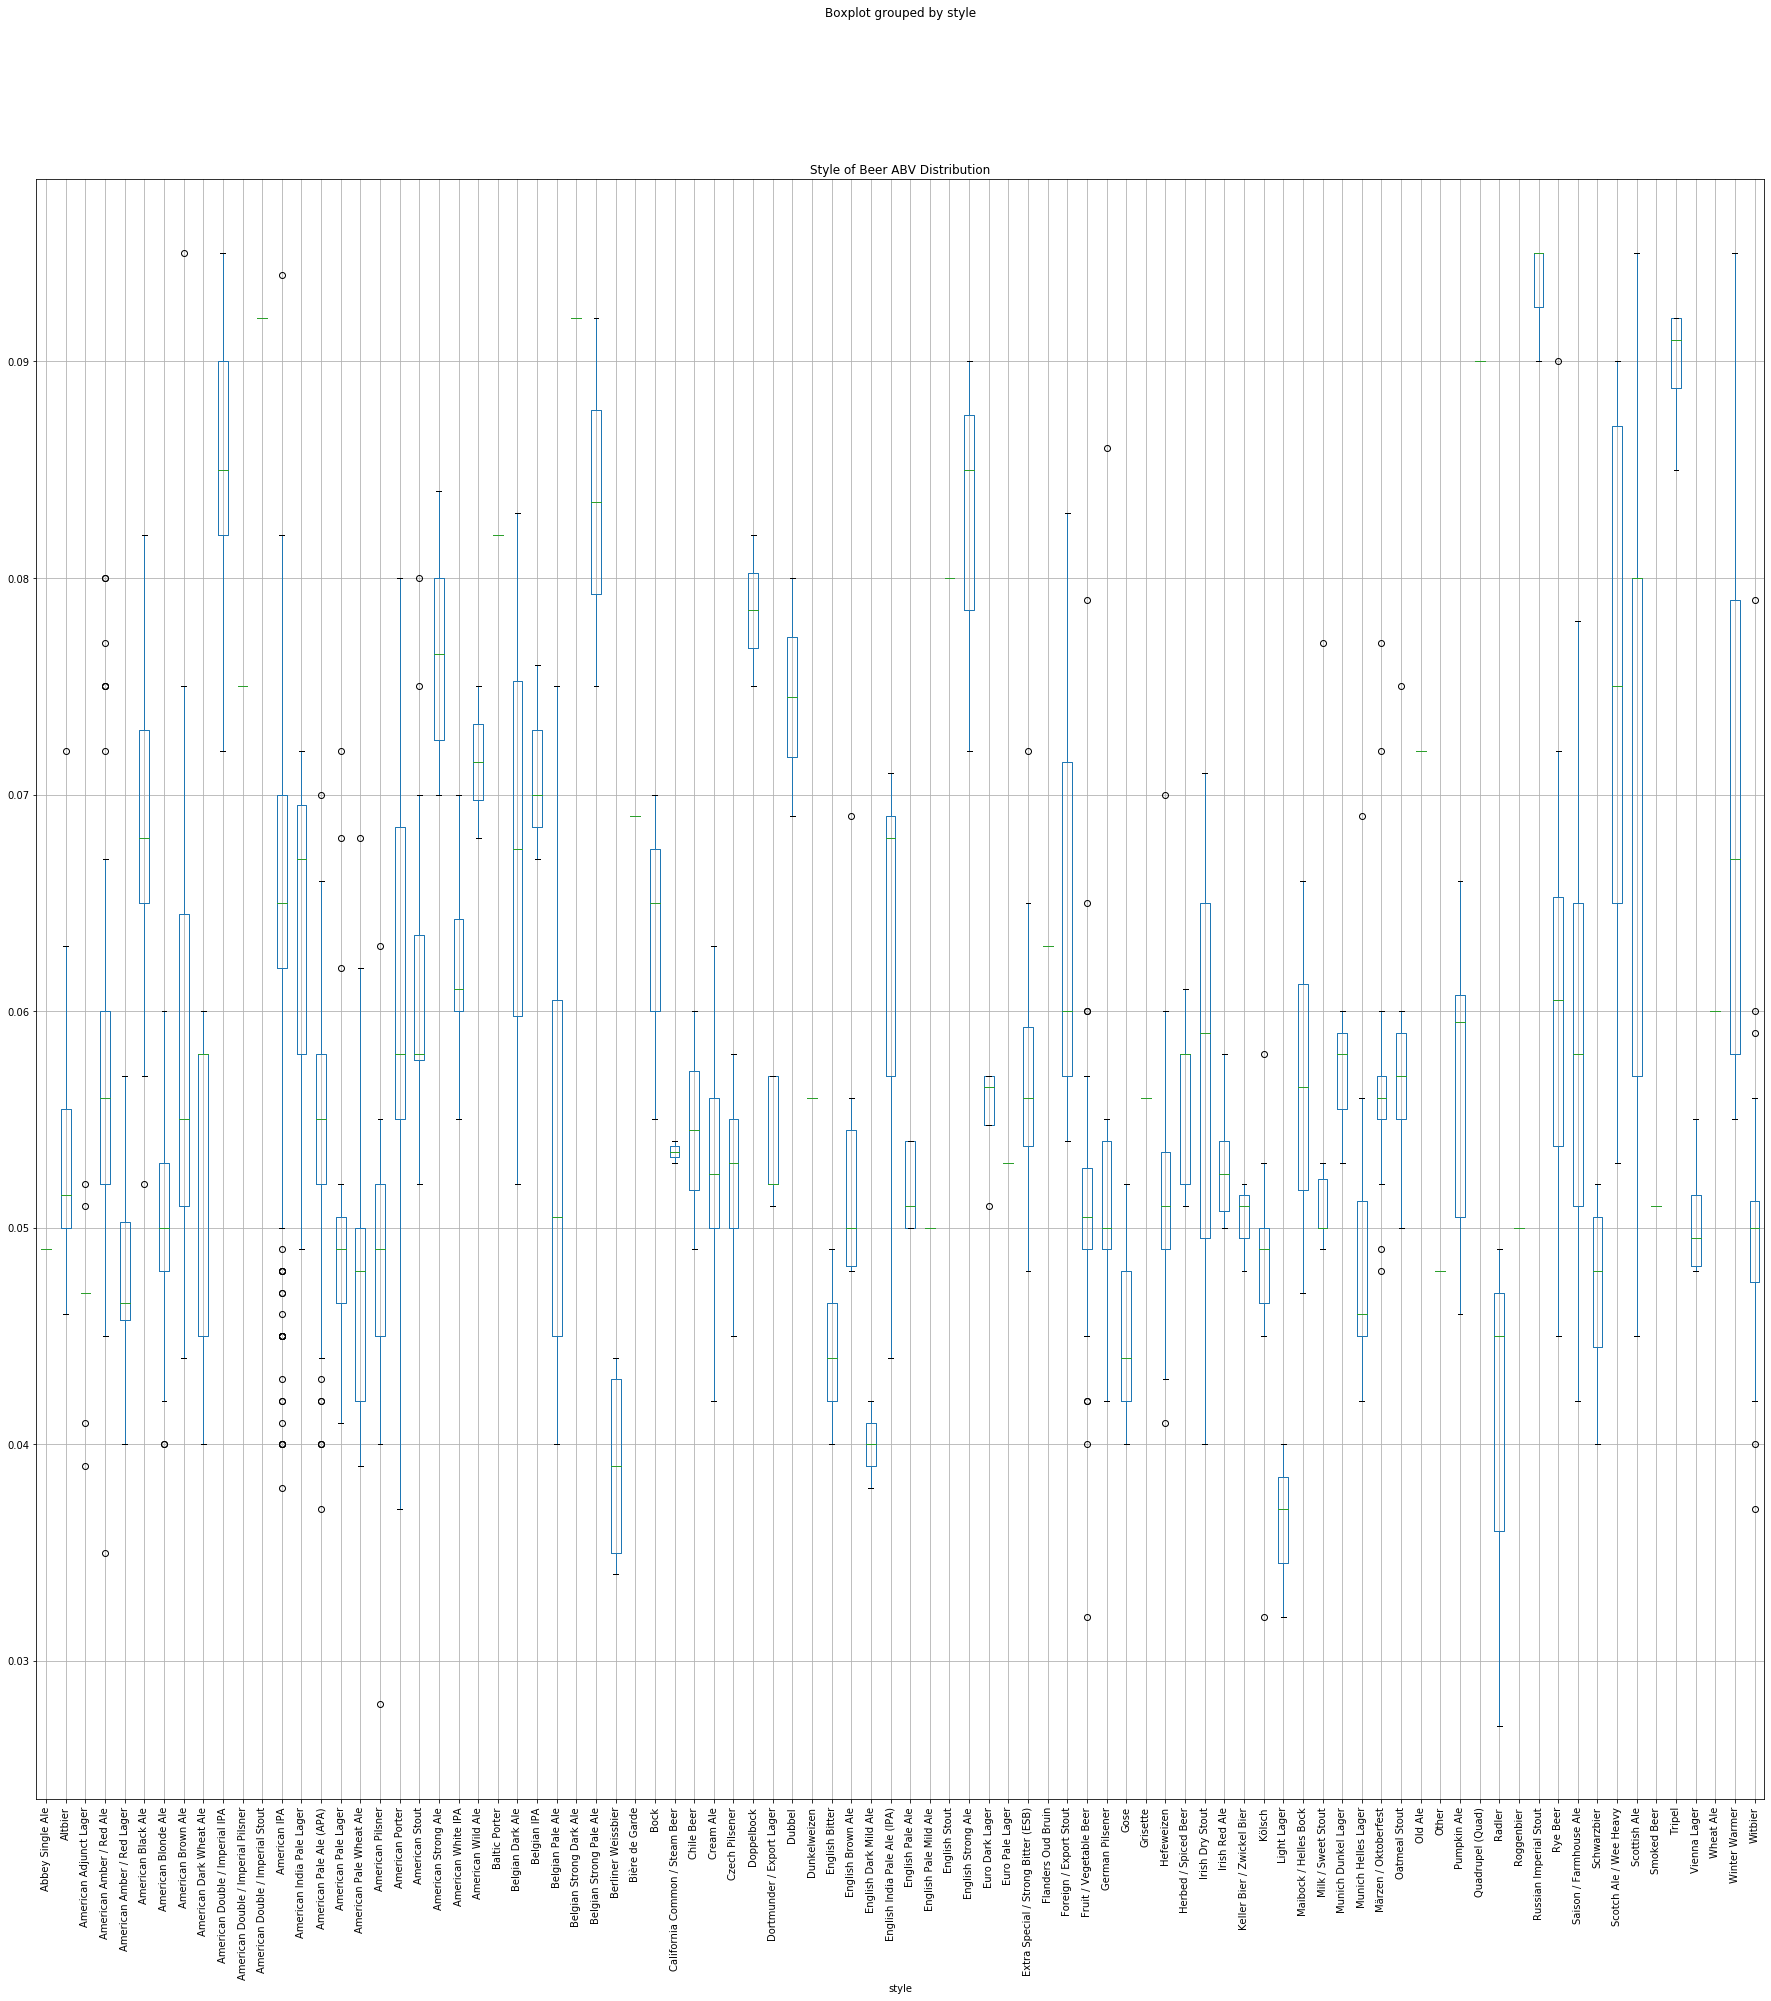

In [61]:
beer.boxplot('abv', by='style', figsize=(30,30), rot=90)
plt.title('Style of Beer ABV Distribution')
plt.savefig('style_dist.png')
plt.show()

In [62]:
lr_model = ols(formula= 'abv~style', data=beer).fit()

In [63]:
anova_table = sm.stats.anova_lm(lr_model, type=2)
print(anova_table)

              df    sum_sq   mean_sq          F         PR(>F)
style       87.0  0.128797  0.001480  25.129757  2.054234e-218
Residual  1283.0  0.075583  0.000059        NaN            NaN


In [64]:
dummy_df = pd.get_dummies(beer['style'], drop_first = True)
dummy_df.head()

,Altbier,American Adjunct Lager,American Amber / Red Ale,American Amber / Red Lager,American Black Ale,American Blonde Ale,American Brown Ale,American Dark Wheat Ale,American Double / Imperial IPA,American Double / Imperial Pilsner,American Double / Imperial Stout,American IPA,American India Pale Lager,American Pale Ale (APA),American Pale Lager,American Pale Wheat Ale,American Pilsner,American Porter,American Stout,American Strong Ale,American White IPA,American Wild Ale,Baltic Porter,Belgian Dark Ale,Belgian IPA,Belgian Pale Ale,Belgian Strong Dark Ale,Belgian Strong Pale Ale,Berliner Weissbier,Bière de Garde,Bock,California Common / Steam Beer,Chile Beer,Cream Ale,Czech Pilsener,Doppelbock,Dortmunder / Export Lager,Dubbel,Dunkelweizen,English Bitter,English Brown Ale,English Dark Mild Ale,English India Pale Ale (IPA),English Pale Ale,English Pale Mild Ale,English Stout,English Strong Ale,Euro Dark Lager,Euro Pale Lager,Extra Special / Strong Bitter (ESB),Flanders Oud Bruin,Foreign / Export Stout,Fruit / Vegetable Beer,German Pilsener,Gose,Grisette,Hefeweizen,Herbed / Spiced Beer,Irish Dry Stout,Irish Red Ale,Keller Bier / Zwickel Bier,Kölsch,Light Lager,Maibock / Helles Bock,Milk / Sweet Stout,Munich Dunkel Lager,Munich Helles Lager,Märzen / Oktoberfest,Oatmeal Stout,Old Ale,Other,Pumpkin Ale,Quadrupel (Quad),Radler,Roggenbier,Russian Imperial Stout,Rye Beer,Saison / Farmhouse Ale,Schwarzbier,Scotch Ale / Wee Heavy,Scottish Ale,Smoked Beer,Tripel,Vienna Lager,Wheat Ale,Winter Warmer,Witbier
14,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
24,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
beer = pd.concat([beer, dummy_df], axis=1)
beer.head()

,abv,ibu,id,name,style,brewery_id,ounces,style_codes,Altbier,American Adjunct Lager,American Amber / Red Ale,American Amber / Red Lager,American Black Ale,American Blonde Ale,American Brown Ale,American Dark Wheat Ale,American Double / Imperial IPA,American Double / Imperial Pilsner,American Double / Imperial Stout,American IPA,American India Pale Lager,American Pale Ale (APA),American Pale Lager,American Pale Wheat Ale,American Pilsner,American Porter,American Stout,American Strong Ale,American White IPA,American Wild Ale,Baltic Porter,Belgian Dark Ale,Belgian IPA,Belgian Pale Ale,Belgian Strong Dark Ale,Belgian Strong Pale Ale,Berliner Weissbier,Bière de Garde,Bock,California Common / Steam Beer,Chile Beer,Cream Ale,Czech Pilsener,Doppelbock,Dortmunder / Export Lager,Dubbel,Dunkelweizen,English Bitter,English Brown Ale,English Dark Mild Ale,English India Pale Ale (IPA),English Pale Ale,English Pale Mild Ale,English Stout,English Strong Ale,Euro Dark Lager,Euro Pale Lager,Extra Special / Strong Bitter (ESB),Flanders Oud Bruin,Foreign / Export Stout,Fruit / Vegetable Beer,German Pilsener,Gose,Grisette,Hefeweizen,Herbed / Spiced Beer,Irish Dry Stout,Irish Red Ale,Keller Bier / Zwickel Bier,Kölsch,Light Lager,Maibock / Helles Bock,Milk / Sweet Stout,Munich Dunkel Lager,Munich Helles Lager,Märzen / Oktoberfest,Oatmeal Stout,Old Ale,Other,Pumpkin Ale,Quadrupel (Quad),Radler,Roggenbier,Russian Imperial Stout,Rye Beer,Saison / Farmhouse Ale,Schwarzbier,Scotch Ale / Wee Heavy,Scottish Ale,Smoked Beer,Tripel,Vienna Lager,Wheat Ale,Winter Warmer,Witbier
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
24,0.044,42.0,876,Bitter American,American Pale Ale (APA),368,12.0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,0.049,17.0,801,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
beer.shape

(1371, 95)

In [67]:
features = beer.drop(columns = ['abv', 'id', 'name', 'style', 'brewery_id', 'ounces'])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)

In [69]:
model = sm.OLS(y_train,X_train.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    abv   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              928.3
Date:                Mon, 30 Mar 2020   Prob (F-statistic):                        0.00
Time:                        20:52:42   Log-Likelihood:                          3908.3
No. Observations:                1096   AIC:                                     -7649.
Df Residuals:                    1012   BIC:                                     -7229.
Df Model:                          84                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
ibu                                     0.0002   1.65e-05     14.519      0.000       0.000       0.000
style_codes                             0.0009   1.28e-05     71.130      0.000       0.001       0.001
Altbier                                 0.0490      0.003     15.201      0.000       0.043       0.055
American Adjunct Lager                  0.0438      0.003     16.235      0.000       0.038       0.049
American Amber / Red Ale                0.0454      0.001     42.009      0.000       0.043       0.048
American Amber / Red Lager              0.0390      0.002     18.696      0.000       0.035       0.043
American Black Ale                      0.0483      0.002     22.965      0.000       0.044       0.052
American Blonde Ale                     0.0395      0.001     37.368      0.000       0.037       0.042
American Brown Ale                      0.0434      0.001     32.887      0.000       0.041       0.046
American Dark Wheat Ale                 0.0383      0.003     11.951      0.000       0.032       0.045
American Double / Imperial IPA          0.0548      0.002     30.736      0.000       0.051       0.058
American Double / Imperial Pilsner      0.0456      0.007      6.300      0.000       0.031       0.060
American Double / Imperial Stout        0.0700      0.007      9.792      0.000       0.056       0.084
American IPA                            0.0377      0.001     33.498      0.000       0.036       0.040
American India Pale Lager               0.0330      0.005      6.484      0.000       0.023       0.043
American Pale Ale (APA)                 0.0314      0.001     35.284      0.000       0.030       0.033
American Pale Lager                     0.0311      0.002     15.536      0.000       0.027       0.035
American Pale Wheat Ale                 0.0290      0.001     27.209      0.000       0.027       0.031
American Pilsner                        0.0272      0.002     12.608      0.000       0.023       0.031
American Porter                         0.0356      0.001     25.651      0.000       0.033       0.038
American Stout                          0.0339      0.002     17.746      0.000       0.030       0.038
American Strong Ale                     0.0423      0.002     18.770      0.000       0.038       0.047
American White IPA                      0.0299      0.003      9.177      0.000       0.023       0.036
American Wild Ale                       0.0450      0.005      8.947      0.000       0.035       0.055
Baltic Porter                         3.31e-17   6.97e-18      4.750      0.000    1.94e-17    4.68e-17
Belgian Dark Ale                        0.0528      0.007      7.423    

In [70]:
ytest_pred = model.predict(X_test)
ytest_pred

2015    0.047739
84      0.050570
1986    0.050416
2304    0.080897
107     0.067787
          ...   
264     0.068026
1180    0.046213
1081    0.048365
905     0.054605
1810    0.059880
Length: 275, dtype: float64

In [71]:
ytrain_pred = model.predict(X_train)

In [72]:
print('Train - Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train, ytrain_pred)))
print('Train - Mean Squared Error:' + str(metrics.mean_squared_error(y_train, ytrain_pred)))
print('Train - SqRt Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, ytrain_pred))))

print("")

print('Test - Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, ytest_pred)))
print('Test - Mean Squared Error:' + str(metrics.mean_squared_error(y_test, ytest_pred)))
print('Test - SqRt Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, ytest_pred))))

Train - Mean Absolute Error:0.00493426355888961
Train - Mean Squared Error:4.6792566965117e-05
Train - SqRt Mean Squared Error:0.006840509262117624

Test - Mean Absolute Error:0.0059933942954904645
Test - Mean Squared Error:7.549626639774337e-05
Test - SqRt Mean Squared Error:0.008688858751167691


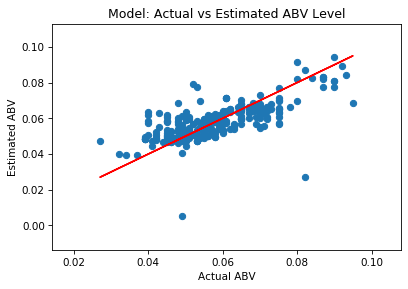

In [73]:
plt.figure(dpi = 75)
plt.scatter(y_test, ytest_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ABV")
plt.ylabel("Estimated ABV")
plt.title("Model: Actual vs Estimated ABV Level")
plt.savefig('ModelTwoResid.png')
plt.show()

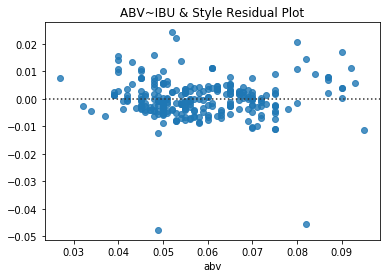

In [74]:
sns.residplot(y_test, ytest_pred)
plt.title('ABV~IBU & Style Residual Plot')
plt.savefig('ABVIBUsty.png')
plt.show()